#**Scenario**: 
Breast cancer is one of the mostly occurred cancers all over the world. It is important to detect and cure it. If this cancer is identified in time, then it could be prevented by treatment. In order to do so, machine learning can help to make prediction to know whether patient has Breast Cancer or not.  

#**Problem statement:**   
Build a predictive model to classify whether patient has cancer or not.


In [24]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Standard
import os, sys, warnings
warnings.filterwarnings('ignore')

# ML related
from scipy import stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, r2_score
%matplotlib inline

In [25]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


**1. Check any missing values are there or not. If there are any, take necessary action.**

In [26]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

No null values.

**2. Find correlation between input data using pearson correlation coefficient.**

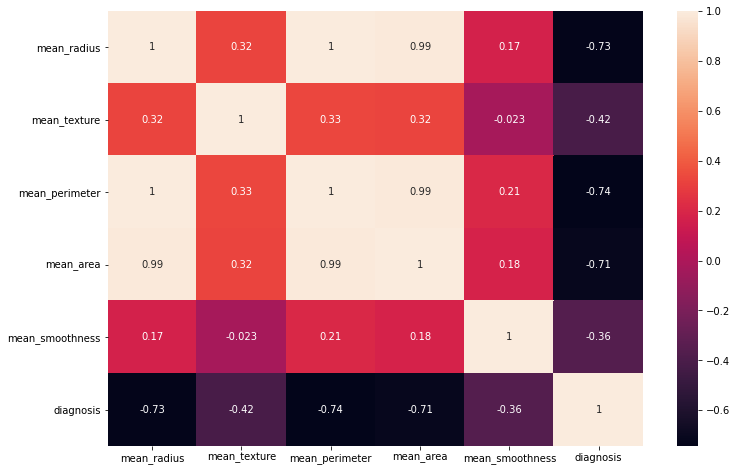

In [27]:
# Correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

In [28]:
# Pearson Correlation between input and target feature
correlation_table = pd.DataFrame()
correlation_table['features'] = df.columns

coeffs = []
p_vs = []
for col in df.columns:

        coeff, p = stats.pearsonr(df[col], df['diagnosis'])
        coeffs.append(coeff)
        p_vs.append(p)

correlation_table['Pearson_Correlation'] = coeffs
correlation_table['P_value'] = p_vs

In [29]:
correlation_table

,features,Pearson_Correlation,P_value
0,mean_radius,-0.730029,8.465941e-96
1,mean_texture,-0.415185,4.058636e-25
2,mean_perimeter,-0.742636,8.436251e-101
3,mean_area,-0.708984,4.734564e-88
4,mean_smoothness,-0.358560,1.051850e-18
5,diagnosis,1.000000,0.000000e+00


In [30]:
y = df.pop('diagnosis')
X = df

In [31]:
X[:5]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


**3.Build classifier using KNN to predict breast cancer. Send normalized data to the model**

In [32]:
X = normalize(X, norm='l1', axis=0, copy=True)

In [33]:
X[:5]

array([[0.002238  , 0.00094572, 0.00234663, 0.0026863 , 0.00215944],
       [0.00255896, 0.00161901, 0.00253963, 0.00355847, 0.00154553],
       [0.00244948, 0.00193608, 0.00248422, 0.00322839, 0.00199894],
       [0.00142068, 0.00185681, 0.0014825 , 0.00103614, 0.00259899],
       [0.00252413, 0.00130651, 0.00258167, 0.00348065, 0.00182932]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier()

In [36]:
knnclf.fit(X_train, y_train)
preds = knnclf.predict(X_test)
print('Accuracy for KNN: ',accuracy_score(y_test, preds))
print('Mean Squared Error for KNN: ',mean_squared_error(y_test, preds))

Accuracy for KNN:  0.9035087719298246
Mean Squared Error for KNN:  0.09649122807017543


**4a. Build linear and logistic regression and find out in this case which regressor is better.  
4b. Find r2 score.  
4c. Find MSE**

In [37]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=1)
logr.fit(X_train, y_train)
preds = logr.predict(X_test)
print('Accuracy for Logistic Regression: ',accuracy_score(y_test, preds))
print('Mean Squared Error for Logistic Regression: ',mean_squared_error(y_test, preds))
print('R2 Value: ',r2_score(y_test, preds))

Accuracy for Logistic Regression:  0.6754385964912281
Mean Squared Error for Logistic Regression:  0.32456140350877194
R2 Value:  -0.48051948051948057


**5. Build a tree-based model to build a classifier. Draw confusion matrix**

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
preds = dtree.predict(X_test)
print('Accuracy for Logistic Regression: ',accuracy_score(y_test, preds))
print('Mean Squared Error for Logistic Regression: ',mean_squared_error(y_test, preds))
print('Confusion Matrix:\n', confusion_matrix(y_test, preds))

Accuracy for Logistic Regression:  0.9298245614035088
Mean Squared Error for Logistic Regression:  0.07017543859649122
Confusion Matrix:
 [[34  3]
 [ 5 72]]


**6.Perform ensemble-based model ie Random forest classifier and check whether there is any improvement in the accuracy of the model.   
Show precision, recall.**

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=1)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)

print('Accuracy for Logistic Regression: ',accuracy_score(y_test, preds))
print('Mean Squared Error for Logistic Regression: ',mean_squared_error(y_test, preds))
print('precision score: ',precision_score(y_test,preds))
print('Recall score: ',recall_score(y_test, preds))

Accuracy for Logistic Regression:  0.9298245614035088
Mean Squared Error for Logistic Regression:  0.07017543859649122
precision score:  0.96
Recall score:  0.935064935064935


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        37
           1       0.96      0.94      0.95        77

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



**8. Build any other classifier to get a model with better performance.**

In [43]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)
preds = nbclf.predict(X_test)

print('Accuracy for Naive Bayes: ',accuracy_score(y_test, preds))
print('Mean Squared Error for Naive Bayes: ',mean_squared_error(y_test, preds))
print('precision score fir Naive Bayes: ',precision_score(y_test,preds))
print('Recall score for Naive Bayes: ',recall_score(y_test, preds))
print('\n',classification_report(y_test, preds))

Accuracy for Naive Bayes:  0.9035087719298246
Mean Squared Error for Naive Bayes:  0.09649122807017543
precision score fir Naive Bayes:  0.9024390243902439
Recall score for Naive Bayes:  0.961038961038961

               precision    recall  f1-score   support

           0       0.91      0.78      0.84        37
           1       0.90      0.96      0.93        77

    accuracy                           0.90       114
   macro avg       0.90      0.87      0.89       114
weighted avg       0.90      0.90      0.90       114

